# atmaCup#10 - EDA

## Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2


import os
from typing import List, Tuple, Any
from pathlib import Path

In [2]:
def input_dir():
    return Path("input")

## art_object (train / test.csv の table)


In [3]:
train_df = pd.read_csv(os.path.join(input_dir() / "train.csv"))
test_df = pd.read_csv(os.path.join(input_dir() / "test.csv"))
print(train_df.shape, test_df.shape)

(12026, 19) (12008, 18)


In [4]:
train_df.head().T

,0,1,2,3,4
object_id,0011d6be41612ec9eae3,0012765f7a97ccc3e9e9,0017be8caa87206532cb,00181d86ff1a7b95864e,001c52ae28ec106d9cd5
art_series_id,93c092ba70beab248f31,95c14fb11c54281ad7e0,4c406890d208fe01f8fb,fa0891535500a4973db2,8065ed5063c5887e677d
title,The Avenue of Birches,Struik in bloei,Portret van een vrouw,A St Bernard Dog,Woelige zee met zeilschepen
description,NaN,NaN,"Portret van eenvrouw, zittend naast een tafel.","Een sint-bernardshond, staand in een landschap...",Woelige zee met zeilschepen.
long_title,"The Avenue of Birches, Jan Hackaert, 1660 - 1685","Struik in bloei, Richard Tepe (attributed to),...","Portret van een vrouw, Tresling & Comp., 1860 ...","A St Bernard Dog, Bernard te Gempt, c. 1850 - ...","Woelige zee met zeilschepen, anonymous, 1825 -..."
principal_maker,Jan Hackaert,Richard Tepe,Tresling & Comp.,Bernard te Gempt,anonymous
principal_or_first_maker,Jan Hackaert,Richard Tepe,Tresling & Comp.,Bernard te Gempt,anonymous
sub_title,h 66.5cm × w 53.7cm × t 2.5cm × d 4.7cm,h 165mm × w 223mm,h 87mm × w 56mm,h 179cm × w 248cm × t 4cm,h 13cm × w 17.5cm × d 0.7cm
copyright_holder,NaN,erven Richard Tepe,NaN,NaN,NaN
more_title,The Avenue of Birches,Struik in bloei,Portret van een vrouw,A St Bernard Dog,Woelige zee met zeilschepen


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12026 entries, 0 to 12025
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   object_id                 12026 non-null  object 
 1   art_series_id             12026 non-null  object 
 2   title                     12026 non-null  object 
 3   description               8506 non-null   object 
 4   long_title                12026 non-null  object 
 5   principal_maker           12026 non-null  object 
 6   principal_or_first_maker  12025 non-null  object 
 7   sub_title                 11992 non-null  object 
 8   copyright_holder          713 non-null    object 
 9   more_title                11891 non-null  object 
 10  acquisition_method        11830 non-null  object 
 11  acquisition_date          11009 non-null  object 
 12  acquisition_credit_line   3525 non-null   object 
 13  dating_presenting_date    12016 non-null  object 
 14  dating

In [6]:
train_df.columns

Index(['object_id', 'art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late', 'likes'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

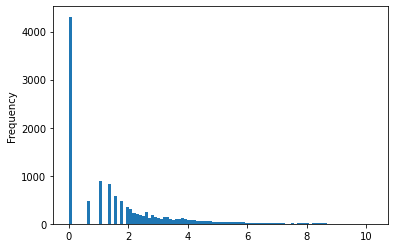

In [7]:
train_df['log_likes'] = np.log1p(train_df['likes'])
train_df['log_likes'].plot.hist(bins=100)

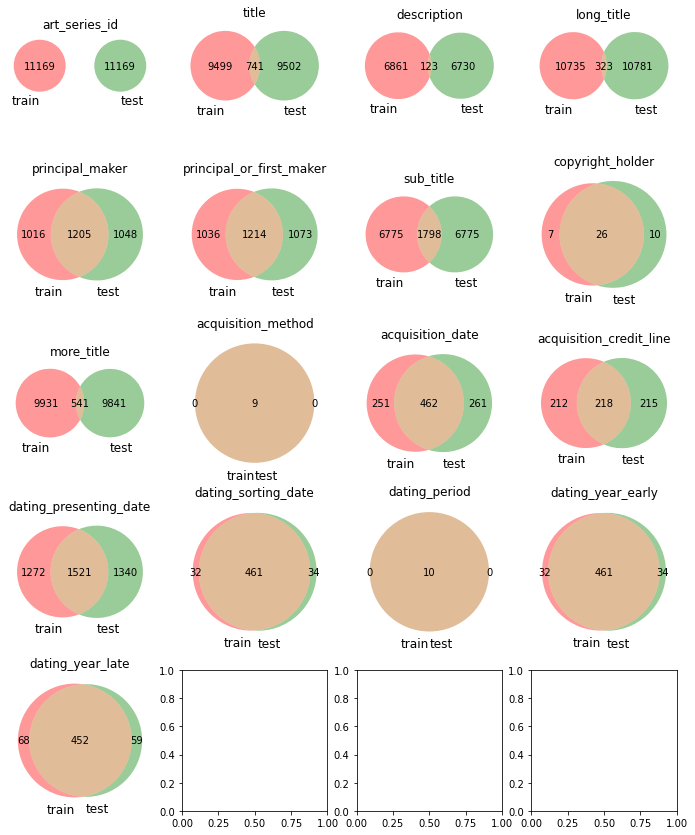

In [8]:
cols = ['art_series_id', 'title', 'description', 'long_title',
       'principal_maker', 'principal_or_first_maker', 'sub_title',
       'copyright_holder', 'more_title', 'acquisition_method',
       'acquisition_date', 'acquisition_credit_line', 'dating_presenting_date',
       'dating_sorting_date', 'dating_period', 'dating_year_early',
       'dating_year_late']

n_figs = len(cols)
n_cols = 4
n_rows = n_figs // n_cols + 1

fix, axes = plt.subplots(figsize=(n_cols * 3, n_rows * 3), ncols=n_cols, nrows=n_rows)

for col, ax in zip(cols, axes.ravel()):
    ax.set_title(f'{col}')
    venn2(subsets=[set(train_df[col].values), 
                   set(test_df[col].values)], 
          set_labels=['train', 'test'], 
          ax=ax)

## color / palette

In [9]:
color_df = pd.read_csv(os.path.join(input_dir() / "color.csv"))
palette_df = pd.read_csv(os.path.join(input_dir() / "palette.csv"))

In [10]:
color_df.head()

,object_id,percentage,hex
0,001020bd00b149970f78,0,#C7C7B6
1,001020bd00b149970f78,9,#5E5333
2,001020bd00b149970f78,14,#3E321B
3,001020bd00b149970f78,3,#B8AF84
4,001020bd00b149970f78,62,#15120C


In [11]:
palette_df.head()

,ratio,color_r,color_g,color_b,object_id
0,0.013781,40,4,0,000405d9a5e3f49fc49d
1,0.040509,221,189,129,000405d9a5e3f49fc49d
2,0.036344,207,175,117,000405d9a5e3f49fc49d
3,0.033316,230,197,129,000405d9a5e3f49fc49d
4,0.039600,194,161,106,000405d9a5e3f49fc49d


## Material

In [12]:
material_df = pd.read_csv(os.path.join(input_dir() / "material.csv"))

In [13]:
material_df.head()

,object_id,name
0,000405d9a5e3f49fc49d,photographic paper
1,000405d9a5e3f49fc49d,cardboard
2,001020bd00b149970f78,oil paint (paint)
3,001020bd00b149970f78,panel
4,0011d6be41612ec9eae3,oil paint (paint)


## Historical Person

In [14]:
historical_person_df = pd.read_csv(os.path.join(input_dir() / "historical_person.csv"))

In [15]:
historical_person_df.head()

,object_id,name
0,00133be3ff222c9b74b0,Staten-Generaal
1,00133be3ff222c9b74b0,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
2,0026e030a0209b834b3e,Raad van Beroerten
3,0026e030a0209b834b3e,"Álvarez de Toledo, Fernando (3e hertog van Alva)"
4,00440ec5a4783b4b6bdb,Dolle Mina


## Object Colletion

In [16]:
object_collection_df = pd.read_csv(os.path.join(input_dir() / "object_collection.csv"))

In [17]:
object_collection_df.head()

,object_id,name
0,001020bd00b149970f78,paintings
1,0011d6be41612ec9eae3,paintings
2,00133be3ff222c9b74b0,prints
3,00181d86ff1a7b95864e,paintings
4,001c52ae28ec106d9cd5,paintings


## Production Place

In [18]:
production_place_df = pd.read_csv(os.path.join(input_dir() / "production_place.csv"))

In [19]:
production_place_df.head()

,object_id,name
0,0012765f7a97ccc3e9e9,Netherlands
1,00133be3ff222c9b74b0,Amsterdam
2,00133be3ff222c9b74b0,Northern Netherlands
3,0017be8caa87206532cb,Amsterdam
4,001b2b8c9d3aa1534dfe,Suriname


In [20]:
production_place_df.name.value_counts()

Amsterdam               4270
Netherlands             2206
Northern Netherlands    1160
Antwerp                 1082
Paris                    947
                        ... 
Avranches                  1
? Utrecht                  1
Caserta                    1
? London                   1
? New York (city)          1
Name: name, Length: 144, dtype: int64

In [21]:
production_place_df['?_is_in'] = production_place_df['name'].str.startswith("?")

In [22]:
production_place_df['name'] = production_place_df['name'].apply(lambda row:row[2:] if row[0]=='?' else row)

In [23]:
production_place_df.groupby("object_id")['name'].apply(np.array)

object_id
0012765f7a97ccc3e9e9                        [Netherlands]
00133be3ff222c9b74b0    [Amsterdam, Northern Netherlands]
0017be8caa87206532cb                          [Amsterdam]
001b2b8c9d3aa1534dfe                           [Suriname]
001c52ae28ec106d9cd5               [Northern Netherlands]
                                      ...                
ffefbe1faf771aa4f790                          [Amsterdam]
fff08e76cbb969eaddc7      [Northern Netherlands, Antwerp]
fffbe07b997bec00e203                      [Great Britain]
fffd43b134ba7197d890                             [London]
ffff22ea12d7f99cff31                            [England]
Name: name, Length: 15547, dtype: object

## Technique

In [24]:
technique_df = pd.read_csv(os.path.join(input_dir() / "technique.csv"))

In [25]:
technique_df.head()

,object_id,name
0,000405d9a5e3f49fc49d,albumen print
1,0012765f7a97ccc3e9e9,salted paper print
2,0012765f7a97ccc3e9e9,albumen print
3,00133be3ff222c9b74b0,etching
4,0017be8caa87206532cb,albumen print


In [26]:
technique_df['name'].value_counts()

etching                          5936
engraving                        5563
albumen print                    5544
gelatin silver print             1158
letterpress printing              722
drypoint                          229
salted paper print                221
slide                             203
painting                          184
steel engraving                   161
collotype                         103
ambrotype                          74
inkjet print                       68
colour woodcut                     53
brush                              48
cyanotype                          43
pen                                34
gelatin silver slide on glass      26
carbon print                       25
ferrotyping                        24
photolithography                   12
gilding                            11
counterproof                       10
writing (processes)                 9
lacquering                          8
printing                            4
printed matt

In [27]:
technique_df.groupby('object_id')['name'].apply(np.array)

object_id
000405d9a5e3f49fc49d                        [albumen print]
0012765f7a97ccc3e9e9    [salted paper print, albumen print]
00133be3ff222c9b74b0                              [etching]
0017be8caa87206532cb                        [albumen print]
001f4c71b4d53497b531                            [engraving]
                                       ...                 
fff4bbb55fd7702d294e                        [albumen print]
fffbe07b997bec00e203                        [albumen print]
fffd1675758205748d7f                        [albumen print]
fffd43b134ba7197d890                        [albumen print]
ffff22ea12d7f99cff31                        [albumen print]
Name: name, Length: 17329, dtype: object

## maker / principal_maker / principal_maker_occupation

In [28]:
maker_df = pd.read_csv(os.path.join(input_dir() / "maker.csv"))
pmaker_df = pd.read_csv(os.path.join(input_dir() / "principal_maker.csv"))
pmaker_occup_df = pd.read_csv(os.path.join(input_dir() / "principal_maker_occupation.csv"))

In [29]:
maker_df.head()

,name,place_of_birth,date_of_birth,date_of_death,place_of_death,nationality
0,'t Hooft,NaN,NaN,NaN,NaN,NaN
1,A. & G. Taylor,NaN,NaN,NaN,NaN,NaN
2,A. Böeseken,'s-Heerenberg,1834-01-12,1919-02-11,Rotterdam,NaN
3,A. Cucumus & Cie.,NaN,NaN,NaN,NaN,NaN
4,A. Dandoy,NaN,NaN,NaN,NaN,NaN


In [30]:
pmaker_df.head()

,id,object_id,qualification,roles,productionPlaces,maker_name
0,1,000405d9a5e3f49fc49d,mentioned on object,NaN,NaN,Bernardus Bruining
1,2,001020bd00b149970f78,workshop of,painter,NaN,Jan Antonisz van Ravesteyn
2,3,0011d6be41612ec9eae3,NaN,painter,NaN,Jan Hackaert
3,4,0012765f7a97ccc3e9e9,attributed to,NaN,Netherlands,Richard Tepe
4,5,00133be3ff222c9b74b0,NaN,print maker,Northern Netherlands,Theodoor Koning


In [31]:
pmaker_occup_df.head()

,id,name
0,2,draughtsman
1,2,painter
2,3,print maker
3,3,draughtsman
4,3,painter


In [36]:
# 単語ベクトル表現の次元数
# 元の語彙数をベースに適当に決めました
model_size = {
    "material": 20,
    "technique": 8,
    "collection": 3,
    "material_collection": 20,
    "material_technique": 20,
    "collection_technique": 10,
    "material_collection_technique": 25
}

n_iter = 100

In [80]:
# Word2Vecの学習
w2v_model = word2vec.Word2Vec(train_df["description"].fillna(''),
                              size=25,
                              min_count=1,
                              window=1,
                              iter=n_iter)

In [77]:
# Word2Vecの学習
w2v_model = word2vec.Word2Vec(group_df["name"],
                              size=25,
                              min_count=1,
                              window=1,
                              iter=n_iter)

In [67]:
from tqdm import tqdm

In [68]:
tqdm.pandas()

In [70]:
group_df["name"].apply(lambda row: np.mean([w2v_model.wv[e] for e in row], axis=0))

0        [1.1372524, 0.7011264, 0.37534404, 0.4748175, ...
1        [-0.014151782, -0.83125454, 0.29570743, 0.0895...
2        [-0.08748382, -0.72506136, 0.41635928, 0.02232...
3        [0.9959011, 0.23750351, 0.2848374, 0.7638969, ...
4        [-0.69516224, 0.20899387, 1.4020361, 0.4597942...
                               ...                        
23948    [0.8615798, 0.1190972, 0.42931992, 0.5615308, ...
23949    [1.1372524, 0.7011264, 0.37534404, 0.4748175, ...
23950    [1.0955411, 0.84442145, -0.4328015, 1.4909583,...
23951    [0.8615798, 0.1190972, 0.42931992, 0.5615308, ...
23952    [0.20815255, 0.22587703, 0.69280463, 0.3397010...
Name: name, Length: 23953, dtype: object

In [ ]:
w2v_dfs = []
for df, df_name in zip(
        [
            material, collection, technique,
            mat_col, mat_tec, col_tec, mat_col_tec
        ], [
            "material", "collection", "technique",
            "material_collection",
            "material_technique",
            "collection_technique",
            "material_collection_technique"
        ]):
    df_group = df.groupby("object_id")["name"].apply(list).reset_index()
    # Word2Vecの学習
    w2v_model = word2vec.Word2Vec(df_group["name"].values.tolist(),
                                  size=model_size[df_name],
                                  min_count=1,
                                  window=1,
                                  iter=n_iter)

    # 各文章ごとにそれぞれの単語をベクトル表現に直し、平均をとって文章ベクトルにする
    sentence_vectors = df_group["name"].progress_apply(
        lambda x: np.mean([w2v_model.wv[e] for e in x], axis=0))
    sentence_vectors = np.vstack([x for x in sentence_vectors])
    sentence_vector_df = pd.DataFrame(sentence_vectors,
                                      columns=[f"{df_name}_w2v_{i}"
                                               for i in range(model_size[df_name])])
    sentence_vector_df.index = df_group["object_id"]
    w2v_dfs.append(sentence_vector_df)